In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [5]:
job_title1 = 'Data Analyst'
job_country = 'United States'
df_da_us = df[(df['job_title_short'] == job_title1) & (df['job_country'] == job_country)].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

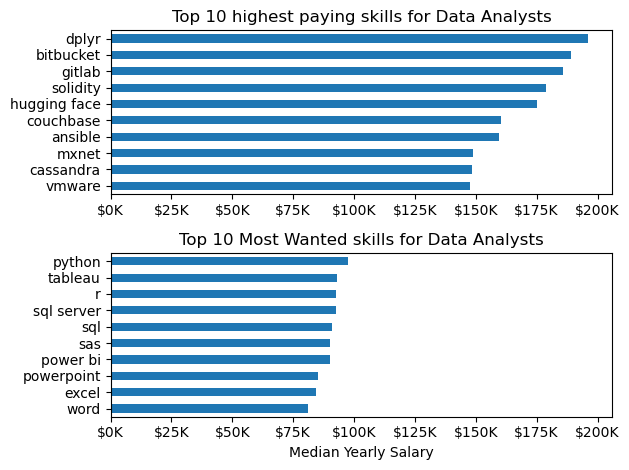

In [ ]:
df_da_us = df_da_us.explode('job_skills')
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

#Previous version from last lesson

fig, ax = plt.subplots(2, 1)
df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) #[::-1] is to reverse the axes, similary to ax[0].invert_yaxis
ax[0].set_title(f'Top 10 highest paying skills for {job_title1}s')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title(f'Top 10 Most Wanted skills for {job_title1}s')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

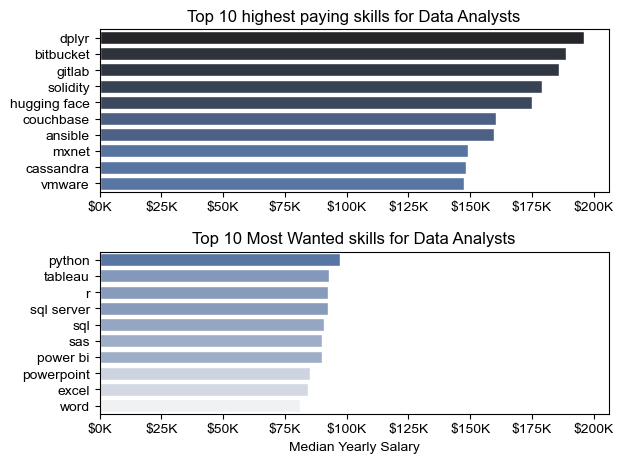

In [12]:
#With Seaborn

fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

#df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) #[::-1] is to reverse the axes, similary to ax[0].invert_yaxis
ax[0].set_title(f'Top 10 highest paying skills for {job_title1}s')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

#df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title(f'Top 10 Most Wanted skills for {job_title1}s')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

Text(0.5, 0, 'Yearly Salary')

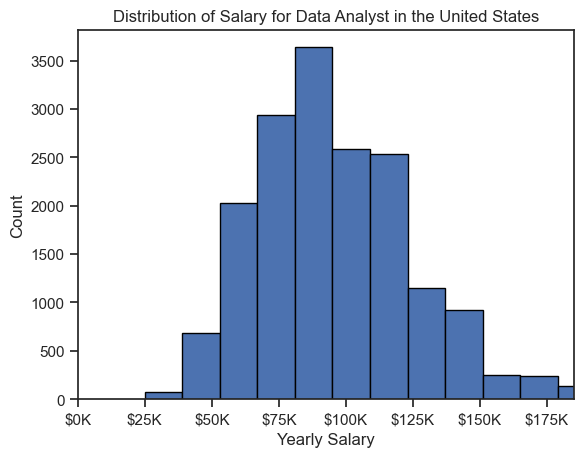

In [ ]:
#Prevoius Version

df_da_us['salary_year_avg'].plot(kind='hist', bins=25, edgecolor='black')
plt.xlim(0, 185_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title(f'Distribution of Salary for Data Analyst in the {job_country}')
plt.ylabel('Count')
plt.xlabel('Yearly Salary')

Text(0.5, 12.44444444444443, 'Yearly Salary')

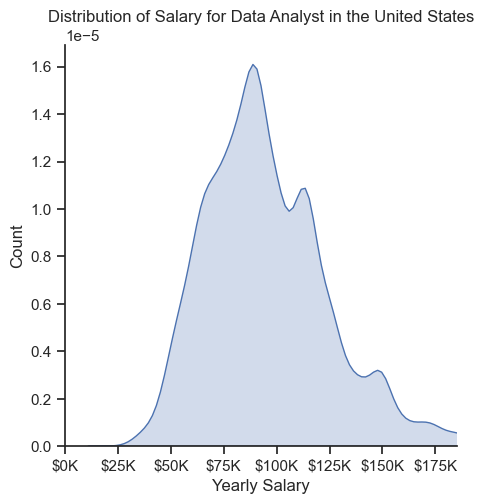

In [17]:
#Seaborn


sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True)

#df_da_us['salary_year_avg'].plot(kind='hist', bins=25, edgecolor='black')
plt.xlim(0, 185_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title(f'Distribution of Salary for Data Analyst in the {job_country}')
plt.ylabel('Count')
plt.xlabel('Yearly Salary')

C:\Users\ITZJA\AppData\Local\Temp\ipykernel_11104\3834024474.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


<function matplotlib.pyplot.show(close=None, block=None)>

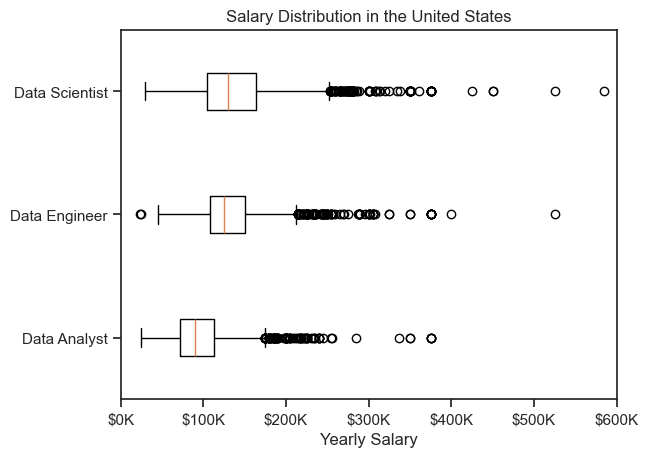

In [19]:
# Previous
job_titles =  ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == job_country)].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title(f'Salary Distribution in the {job_country}')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

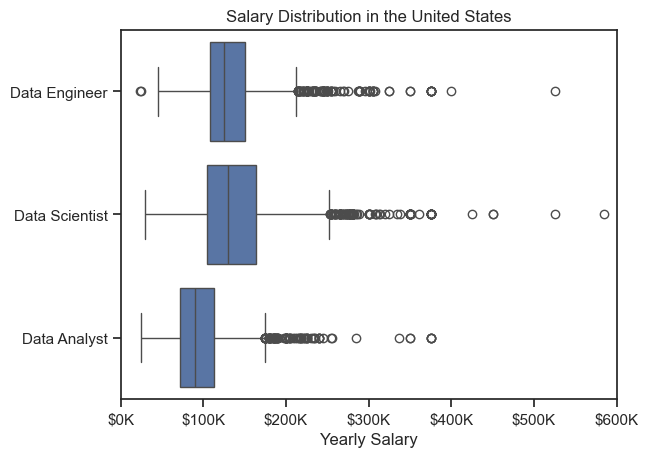

In [21]:
#Seaborn


sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')

#plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title(f'Salary Distribution in the {job_country}')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show